In [1]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from src import config


This dataset provides estimates of the number of people of all ages in seven categories: Christians, Muslims, Hindus, Buddhists, Jews, people who belong to other religions, and those who are religiously unaffiliated.

This analysis is based on more than 2,700 sources of data, including national censuses, large-scale demographic surveys, general population surveys and population registers. Our estimates cover 201 countries and territories that had populations of at least 100,000 people in 2010 or 2020. Collectively, these places are home to 99.98% of the world’s population. Data on country population totals and general demographic characteristics come from the 2024 revision of the United Nations’ World Population Prospects.

In [2]:
df = pd.read_csv(config.DATA_PATH)
df.head()

,Region,Country,Year,Population,Christians,Muslims,Religiously_unaffiliated,Buddhists,Hindus,Jews,Other_religions,Level,Countrycode
0,World,All World,2010,"7,020,588,096","2,147,229,418","1,675,799,697","1,635,247,024","342,747,232","1,051,543,332","13,913,864","154,107,528",3,900
1,World,All World,2020,"7,885,807,101","2,268,860,679","2,022,590,461","1,905,359,982","324,185,581","1,177,861,089","14,779,638","172,169,677",3,900
2,Asia-Pacific,All Asia-Pacific,2010,"4,128,253,668","253,421,219","1,022,290,072","1,363,120,346","336,315,490","1,043,564,086","181,429","109,361,020",2,90001
3,Asia-Pacific,All Asia-Pacific,2020,"4,544,798,237","268,839,155","1,187,663,747","1,492,753,842","316,111,123","1,166,709,664","185,058","112,535,650",2,90001
4,Europe,All Europe,2010,"741,696,840","553,631,592","39,278,971","138,737,705","2,011,820","1,652,525","1,388,749","4,995,478",2,90002


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Region                    416 non-null    object
 1   Country                   416 non-null    object
 2   Year                      416 non-null    int64 
 3   Population                416 non-null    object
 4   Christians                416 non-null    object
 5   Muslims                   416 non-null    object
 6   Religiously_unaffiliated  416 non-null    object
 7   Buddhists                 416 non-null    object
 8   Hindus                    416 non-null    object
 9   Jews                      416 non-null    object
 10  Other_religions           416 non-null    object
 11  Level                     416 non-null    int64 
 12  Countrycode               416 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 42.4+ KB


In [4]:
#decade_trend.info()

#columnns to covert to integer type
num_cols = [
    'Christians', 'Muslims','Religiously_unaffiliated',
    'Buddhists','Hindus','Jews','Other_religions', 'Population'
]

df[num_cols] = df[num_cols].apply(lambda x: x.str.replace(',', '').astype(int))

religion_cols = num_cols[:-1]

In [5]:
region_df = df[["Country" , "Year"] + religion_cols]
region_df



,Country,Year,Christians,Muslims,Religiously_unaffiliated,Buddhists,Hindus,Jews,Other_religions
0,All World,2010,2147229418,1675799697,1635247024,342747232,1051543332,13913864,154107528
1,All World,2020,2268860679,2022590461,1905359982,324185581,1177861089,14779638,172169677
2,All Asia-Pacific,2010,253421219,1022290072,1363120346,336315490,1043564086,181429,109361020
3,All Asia-Pacific,2020,268839155,1187663747,1492753842,316111123,1166709664,185058,112535650
4,All Europe,2010,553631592,39278971,138737705,2011820,1652525,1388749,4995478
...,...,...,...,...,...,...,...,...,...
411,Yemen,2020,20138,36085366,22243,197,2798,73,4047
412,Zambia,2010,13642001,70598,11088,304,2542,172,238890
413,Zambia,2020,18731646,97449,11389,363,3061,191,215296
414,Zimbabwe,2010,11278972,67145,1667285,5805,6528,416,330397


In [6]:
region_df_long = region_df.melt(id_vars = ["Country", "Year"], value_vars = religion_cols, var_name = "Religion", value_name = "Count")

print(region_df_long)

               Country  Year         Religion       Count
0            All World  2010       Christians  2147229418
1            All World  2020       Christians  2268860679
2     All Asia-Pacific  2010       Christians   253421219
3     All Asia-Pacific  2020       Christians   268839155
4           All Europe  2010       Christians   553631592
...                ...   ...              ...         ...
2907             Yemen  2020  Other_religions        4047
2908            Zambia  2010  Other_religions      238890
2909            Zambia  2020  Other_religions      215296
2910          Zimbabwe  2010  Other_religions      330397
2911          Zimbabwe  2020  Other_religions      256850

[2912 rows x 4 columns]


### 1. Religion Composition Across the Globe

These bar charts show the global religion compositions in 2010 and 2020.

In [7]:
colors = ["#1d3557", "#457b9d","#a8dadc",  "#a6ada3", "#b34952", "#e9c46a", "#744276"]

#set year the index for easier categorization
rel_percent = df[df["Country"] == "All World"].set_index("Year")[religion_cols].\
    div(df[df["Country"] == "All World"]["Population"].values, axis=0) * 100
#rel_percent = rel_percent[rel_percent.loc[2010].sort_values(ascending=False).index]


#print(rel_percent.index)

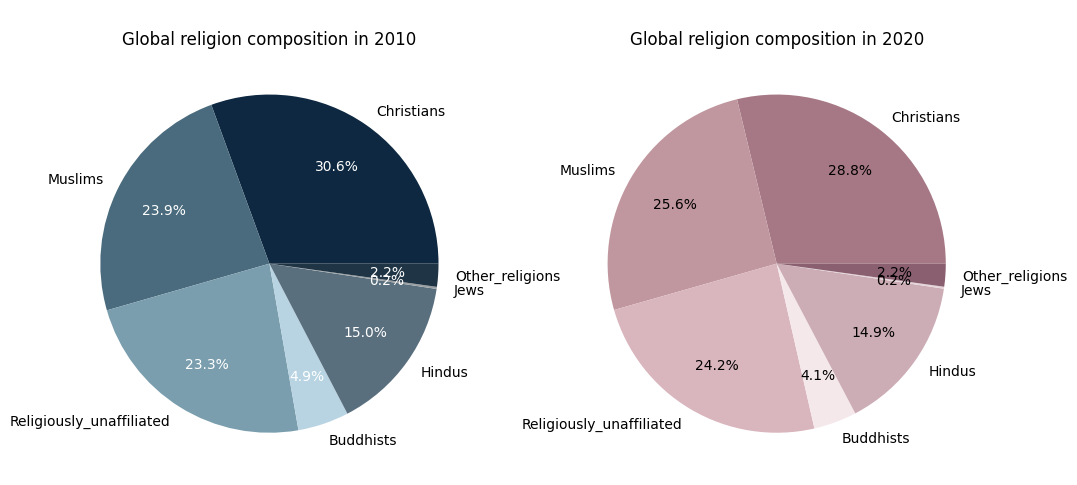

In [8]:
blue_colors = ["#0D2840", "#4A6B7D","#7A9EAE", "#B8D4E3", "#5A6F7E", "#9BA0A3", "#1F3545"]
pink_colors = ["#A67885", "#C0969F", "#D9B5BD", "#F5E8EB", "#CCACB5", "#E5D4D9", "#8A6070"]

#composition by year
rel_percent_2010 = rel_percent.loc[2010]
rel_percent_2020 = rel_percent.loc[2020]

fig, ax = plt.subplots(1,2,figsize=(12,8))

#pie chart
wedges1, texts1, autotexts1 = ax[0].pie(rel_percent_2010, autopct='%1.1f%%', 
                                          labels=religion_cols,pctdistance=0.7, colors=blue_colors)
wedges2, texts2, autotexts2 = ax[1].pie(rel_percent_2020, autopct='%1.1f%%', 
                                          labels=religion_cols, pctdistance=0.7,colors=pink_colors)

for autotext in autotexts1:
    autotext.set_color("white")
'''for autotext in autotexts2:
    autotext.set_color("white")'''

#title
ax[0].set_title("\nGlobal religion composition in 2010")
ax[1].set_title("\nGlobal religion composition in 2020")

plt.show()

In [9]:
filtered_df = df[df["Level"] == 1].copy()

filtered_df["Christians"].info()
fig = px.choropleth(
    filtered_df.sort_values("Year"),
    locations = "Country",
    locationmode="country names",
    color="Christians",
    animation_frame="Year",
    hover_name="Country",
    hover_data=["Christians"],
    color_continuous_scale="Purples",
    labels={"Christians":"Count"}
)

fig.update_layout(
    title_text="Christian populations around the world"
)
fig.show()
fig.write_html("global_christians.html")

<class 'pandas.core.series.Series'>
Index: 402 entries, 14 to 415
Series name: Christians
Non-Null Count  Dtype
--------------  -----
402 non-null    int64
dtypes: int64(1)
memory usage: 6.3 KB


/var/folders/v1/235czjl53nn38s945f47d6k80000gn/T/ipykernel_2385/381527600.py:4: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


### 2. Analysis of Christian Populations

In [50]:
from great_tables import GT, md, html

#percentage of christians in a given nation
filtered_df["natl_chr_prop(%)"] = round((filtered_df["Christians"] / 
                                            filtered_df["Population"]) * 100, 2)
#percentage of christians in the world
filtered_df["wrld_chr_prop(%)"] = filtered_df.groupby("Year")["Christians"].transform(
    lambda x: round((x / x.sum()) * 100, 2)
)


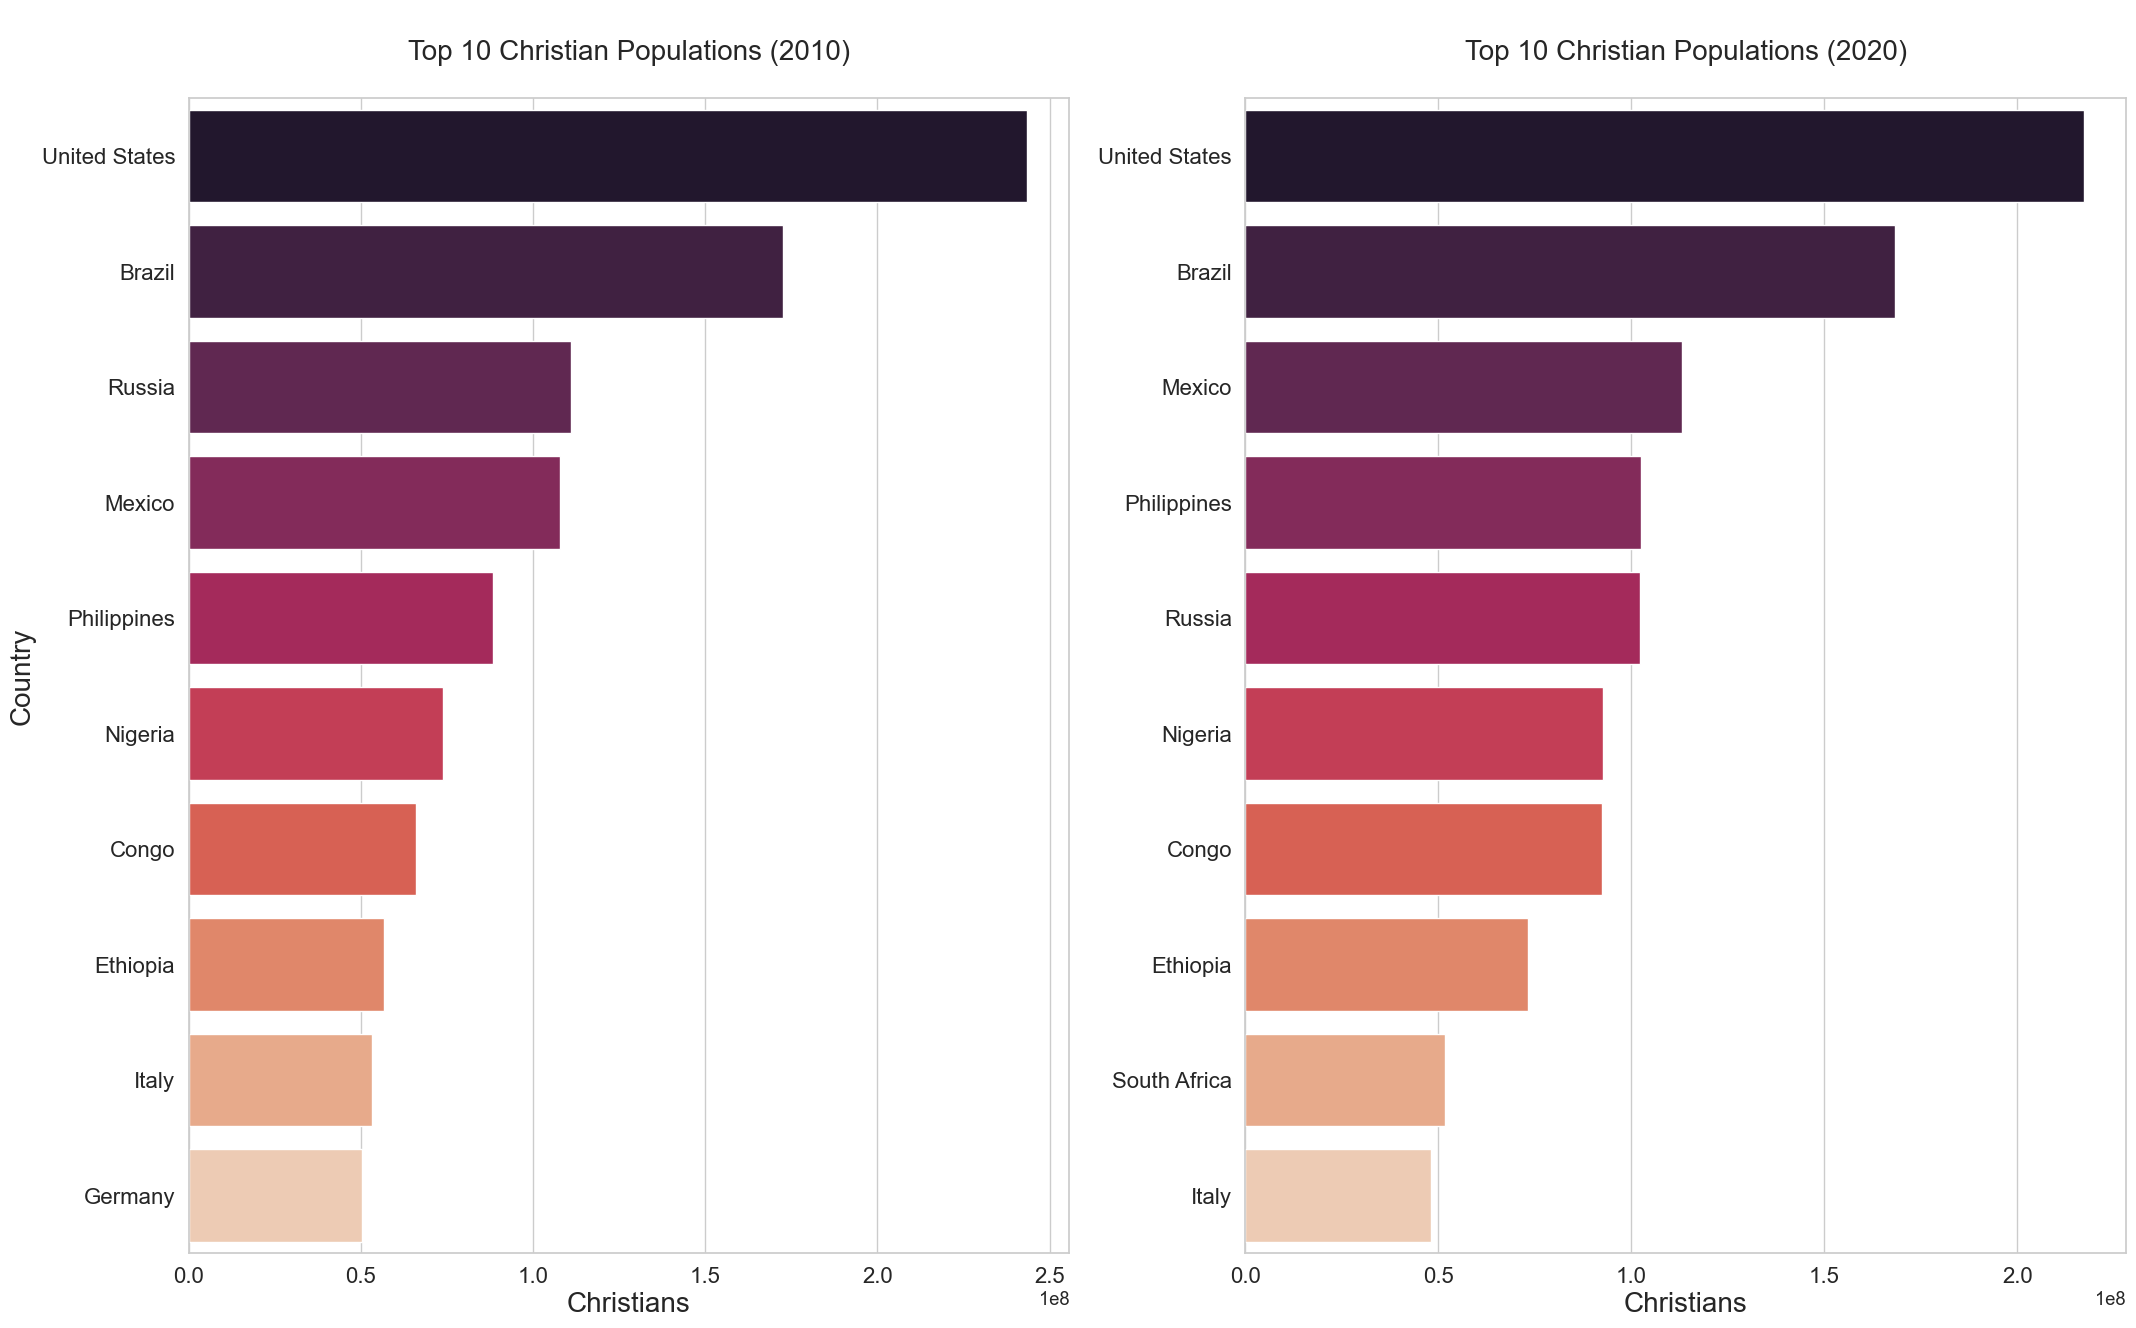

In [51]:
#Top Christian countries by count
Top_Christian_2010 = filtered_df[filtered_df["Year"] == 2010]\
    .sort_values(by="Christians", ascending=False)\
        [["Country","Christians", "Population","natl_chr_prop(%)", "wrld_chr_prop(%)"]].head(10)

#top christian populations on national level in 2010
Chr2010_NP = filtered_df[(filtered_df["Year"] == 2010)]\
    .sort_values(by="natl_chr_prop(%)", ascending=False)\
        [["Country","Christians", "Population","natl_chr_prop(%)", "wrld_chr_prop(%)"]].head(10)

#sns.barplot(data=Chr2010_NP, x="natl_chr_prop(%)", y="Country", hue ="Country", palette="viridis")
Top_Christian_2020 = filtered_df[(filtered_df["Year"] == 2020)]\
    .sort_values(by="Christians", ascending=False)\
        [["Country","Christians", "Population", "natl_chr_prop(%)", "wrld_chr_prop(%)"]].head(10)

#shorten country name for better plotting
Top_Christian_2010["Country"] = Top_Christian_2010["Country"].replace("Democratic Republic of the Congo", "Congo")
Top_Christian_2020["Country"] = Top_Christian_2020["Country"].replace("Democratic Republic of the Congo", "Congo")

fig, ax = plt.subplots (1,2, figsize=(25,15))

sns.barplot(data=Top_Christian_2010, x="Christians", y="Country", hue ="Country", palette="rocket", ax=ax[0])
ax[0].set_title("\nTop 10 Christian Populations (2010)\n", fontsize=20)
ax[0].tick_params(axis="x", labelsize=16)
ax[0].tick_params(axis="y", labelsize=16)
ax[0].set_xlabel("Christians", fontsize=20) 
ax[0].set_ylabel("Country", fontsize=20)

sns.barplot(data=Top_Christian_2020, x="Christians", y="Country", hue ="Country", palette="rocket", ax=ax[1])
ax[1].set_title("\nTop 10 Christian Populations (2020)\n", fontsize=20)
ax[1].set_ylabel("") #remove y-axis lable
ax[1].tick_params(axis="x", labelsize=16)
ax[1].tick_params(axis="y", labelsize=16)
ax[1].set_xlabel("Christians", fontsize=20) 

plt.show()

filtered_df["chr_change"] = filtered_df

In [117]:
Chr2010_NP = filtered_df[(filtered_df["Year"] == 2010)]\
    .sort_values(by="natl_chr_prop(%)", ascending=False)\
        [["Region","Country","Christians", "Population","natl_chr_prop(%)", "wrld_chr_prop(%)"]].head(10)
chr_table_2010 = (GT(Chr2010_NP)
 .tab_header(
     title="Top Christian Countries by National Proportion(2010)"
 )
 .tab_options(table_font_size="12px")
 .opt_stylize(color="gray")
 .cols_label(**{"natl_chr_prop(%)": "National Proportion(%)",
                "wrld_chr_prop(%)": "Global Proportion(%)"})
 .fmt_number(columns=["Christians","Population"]))

chr_table_2010

chr_table_2010.save("chr_table_2010.png")
               

GT(_tbl_data=                      Region                         Country  Christians  \
290             Asia-Pacific                Papua New Guinea     7596898   
372             Asia-Pacific                     Timor-Leste     1078335   
310                   Europe                         Romania    20283571   
126             Asia-Pacific  Federated States of Micronesia      106235   
316             Asia-Pacific                           Samoa      190341   
248                   Europe                         Moldova     3554717   
376             Asia-Pacific                           Tonga      105049   
412       Sub-Saharan Africa                          Zambia    13642001   
24              Asia-Pacific                         Armenia     2858753   
34   Latin America-Caribbean                         Bahamas      358283   

     Population  natl_chr_prop(%)  wrld_chr_prop(%)  
290     7633523             99.52              0.35  
372     1084680             99.42              0.05  
310    20432574             99.27              0.94  
126      107540             98.79              0.00  
316      193023             98.61              0.01  
248     3631992             97.87              0.17  
376      107400             97.81              0.00  
412    13965594             97.68              0.64  
24      2931078             97.53              0.13  
34       367478             97.50              0.02  , _body=<great_tables._gt_data.Body object at 0x123ea4140>, _boxhead=Boxhead([ColInfo(var='Region', type=<ColInfoTypeEnum.default: 1>, column_label='Region', column_align='left', column_width=None), ColInfo(var='Country', type=<ColInfoTypeEnum.default: 1>, column_label='Country', column_align='left', column_width=None), ColInfo(var='Christians', type=<ColInfoTypeEnum.default: 1>, column_label='Christians', column_align='right', column_width=None), ColInfo(var='Population', type=<ColInfoTypeEnum.default: 1>, column_label='Population', column_align='right', column_width=None), ColInfo(var='natl_chr_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='National Proportion(%)', column_align='right', column_width=None), ColInfo(var='wrld_chr_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='Global Proportion(%)', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x123ea5370>, _spanners=Spanners([]), _heading=Heading(title='Top Christian Countries by National Proportion(2010)', subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x1240e1f40>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x1240e0ec0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x1240e23c0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x123f1bd10>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='12px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_fo

In [118]:
Chr2020_NP = filtered_df[(filtered_df["Year"] == 2020)]\
    .sort_values(by="natl_chr_prop(%)", ascending=False)\
        [["Region","Country","Christians", "Population","natl_chr_prop(%)", "wrld_chr_prop(%)"]].head(10)
chr_table_2020 = (GT(Chr2020_NP)
 .tab_header(
     title="Top Christian Countries by National Proportion(2020)"
 )
 .tab_options(table_font_size="12px")
 .opt_stylize(color="gray")
 .cols_label(**{"natl_chr_prop(%)": "National Proportion(%)",
                "wrld_chr_prop(%)": "Global Proportion(%)"})
 .fmt_number(columns=["Christians","Population"]))

chr_table_2020

chr_table_2020.save("chr_table_2020.png")
               

GT(_tbl_data=                      Region                         Country  Christians  \
373             Asia-Pacific                     Timor-Leste     1319892   
249                   Europe                         Moldova     3054839   
291             Asia-Pacific                Papua New Guinea     9726407   
127             Asia-Pacific  Federated States of Micronesia      109589   
311                   Europe                         Romania    19109726   
413       Sub-Saharan Africa                          Zambia    18731646   
377             Asia-Pacific                           Tonga      103340   
317             Asia-Pacific                           Samoa      206930   
35   Latin America-Caribbean                         Bahamas      386320   
201             Asia-Pacific                        Kiribati      123035   

     Population  natl_chr_prop(%)  wrld_chr_prop(%)  
373     1326054             99.54              0.06  
249     3069131             99.53              0.13  
291     9815746             99.09              0.43  
127      110917             98.80              0.00  
311    19392469             98.54              0.84  
413    19059395             98.28              0.83  
377      105704             97.76              0.00  
317      211944             97.63              0.01  
35       395863             97.59              0.02  
201      126099             97.57              0.01  , _body=<great_tables._gt_data.Body object at 0x1250ead20>, _boxhead=Boxhead([ColInfo(var='Region', type=<ColInfoTypeEnum.default: 1>, column_label='Region', column_align='left', column_width=None), ColInfo(var='Country', type=<ColInfoTypeEnum.default: 1>, column_label='Country', column_align='left', column_width=None), ColInfo(var='Christians', type=<ColInfoTypeEnum.default: 1>, column_label='Christians', column_align='right', column_width=None), ColInfo(var='Population', type=<ColInfoTypeEnum.default: 1>, column_label='Population', column_align='right', column_width=None), ColInfo(var='natl_chr_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='National Proportion(%)', column_align='right', column_width=None), ColInfo(var='wrld_chr_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='Global Proportion(%)', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x1243c20c0>, _spanners=Spanners([]), _heading=Heading(title='Top Christian Countries by National Proportion(2020)', subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x123f19310>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x123f19580>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x123f1b7d0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x123ea4740>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='12px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_fo

In [73]:
Chr2010_GP = filtered_df[(filtered_df["Year"] == 2010)]\
    .sort_values(by="wrld_chr_prop(%)", ascending=False)\
        [["Country","Christians", "Population","wrld_chr_prop(%)","natl_chr_prop(%)"]].head(10)

(GT(Chr2010_GP)
 .tab_header(
     title="Top Christian Countries by Global Proportion(2010)"
 )
 .tab_options(table_font_size="12px")
 .opt_stylize(color="gray")
 .cols_label(**{"natl_chr_prop(%)": "National Proportion(%)",
                "wrld_chr_prop(%)": "Global Proportion(%)"})
 .fmt_number(columns=["Christians","Population"]))
               

GT(_tbl_data=                              Country  Christians  Population  \
396                     United States   243496650   311062790   
58                             Brazil   172701282   193701930   
312                            Russia   110955820   143934466   
246                            Mexico   107963147   113623895   
296                       Philippines    88412669    96337125   
274                           Nigeria    73978220   166642886   
102  Democratic Republic of the Congo    66161426    68563038   
124                          Ethiopia    56635368    90538514   
186                             Italy    53242720    60164213   
144                           Germany    50301328    80830924   

     wrld_chr_prop(%)  natl_chr_prop(%)  
396             11.34             78.28  
58               8.04             89.16  
312              5.17             77.09  
246              5.03             95.02  
296              4.12             91.77  
274              3.45             44.39  
102              3.08             96.50  
124              2.64             62.55  
186              2.48             88.50  
144              2.34             62.23  , _body=<great_tables._gt_data.Body object at 0x124a8e960>, _boxhead=Boxhead([ColInfo(var='Country', type=<ColInfoTypeEnum.default: 1>, column_label='Country', column_align='left', column_width=None), ColInfo(var='Christians', type=<ColInfoTypeEnum.default: 1>, column_label='Christians', column_align='right', column_width=None), ColInfo(var='Population', type=<ColInfoTypeEnum.default: 1>, column_label='Population', column_align='right', column_width=None), ColInfo(var='wrld_chr_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='Global Proportion(%)', column_align='right', column_width=None), ColInfo(var='natl_chr_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='National Proportion(%)', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x123d23a10>, _spanners=Spanners([]), _heading=Heading(title='Top Christian Countries by Global Proportion(2010)', subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x123c06c60>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x124a8f830>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x124a8f890>, _formats=[<great_tables._gt_data.FormatInfo object at 0x124a8ebd0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='12px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_

In [57]:
#global proportion
Chr2020_GP = filtered_df[(filtered_df["Year"] == 2020)]\
    .sort_values(by="wrld_chr_prop(%)", ascending=False)\
        [["Country","Christians", "Population", "wrld_chr_prop(%)","natl_chr_prop(%)"]].head(10)

(GT(Chr2020_GP)
 .tab_header(
     title="Top Christian Countries by Global Proportion(2020)"
 )
 .tab_options(table_font_size="12px")
 .opt_stylize(color="gray")
 .cols_label(**{"natl_chr_prop(%)": "National Proportion(%)",
                "wrld_chr_prop(%)": "Global Proportion(%)"})
 .fmt_number(columns=["Christians","Population"])
               
)

GT(_tbl_data=                              Country  Christians  Population  \
397                     United States   217273083   339436159   
59                             Brazil   168295544   208660843   
247                            Mexico   113070626   126799055   
297                       Philippines   102510876   112081264   
313                            Russia   102351281   146371299   
275                           Nigeria    92770287   213996181   
103  Democratic Republic of the Congo    92401422    95989998   
125                          Ethiopia    73227447   118917672   
341                      South Africa    51633743    60562381   
187                             Italy    48212882    59912769   

     wrld_chr_prop(%)  natl_chr_prop(%)  
397              9.58             64.01  
59               7.42             80.66  
247              4.98             89.17  
297              4.52             91.46  
313              4.51             69.93  
275              4.09             43.35  
103              4.07             96.26  
125              3.23             61.58  
341              2.28             85.26  
187              2.12             80.47  , _body=<great_tables._gt_data.Body object at 0x124b8f6b0>, _boxhead=Boxhead([ColInfo(var='Country', type=<ColInfoTypeEnum.default: 1>, column_label='Country', column_align='left', column_width=None), ColInfo(var='Christians', type=<ColInfoTypeEnum.default: 1>, column_label='Christians', column_align='right', column_width=None), ColInfo(var='Population', type=<ColInfoTypeEnum.default: 1>, column_label='Population', column_align='right', column_width=None), ColInfo(var='wrld_chr_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='Global Proportion(%)', column_align='right', column_width=None), ColInfo(var='natl_chr_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='National Proportion(%)', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x124b8c9e0>, _spanners=Spanners([]), _heading=Heading(title='Top Christian Countries by Global Proportion(2020)', subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x124b8f290>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x124b8f2c0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x124b8d940>, _formats=[<great_tables._gt_data.FormatInfo object at 0x124b8f740>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='12px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_

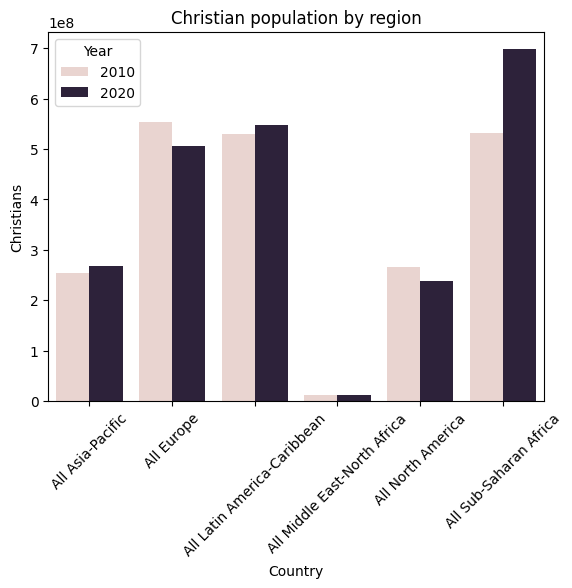

In [43]:
nation_df = df[df["Level"] == 2].copy()
#percentage of christians in a given region
nation_df["natl_chr_prop(%)"] = round((nation_df["Christians"] / 
                                            nation_df["Population"]) * 100, 2)
#percentage of christians in the world
nation_df["wrld_chr_prop(%)"] = nation_df.groupby("Year")["Christians"].transform(
    lambda x: round((x / x.sum()) * 100, 2)
)

sns.barplot(data=nation_df, x="Country",y="Christians", hue ="Year")
plt.xticks(rotation=45)
plt.title("Christian population by region")
plt.show()



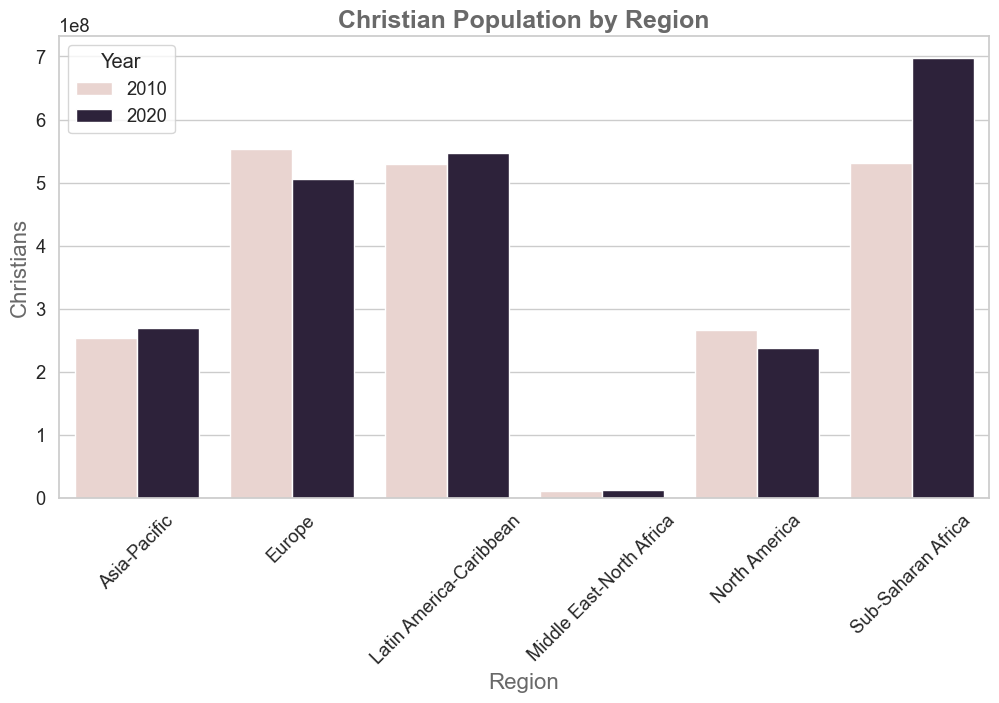

In [88]:
# 1. Quick Data Cleaning: Shorten the long region names
nation_df["Country"] = nation_df["Country"].str.replace("All ", "")

# 2. Set global style: This handles font sizes for EVERYTHING at once
sns.set_theme(style="whitegrid", font_scale=1.2)

# 3. Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=nation_df, x="Country", y="Christians", hue="Year")

# 4. Final Touches
ax.set_title("Christian Population by Region", fontsize=18, color="dimgrey", fontweight="bold")
ax.set_xlabel("Region", fontsize=16, color="dimgrey")
ax.set_ylabel("Christians", fontsize=16, color="dimgrey")

# This handles the scientific notation size automatically due to font_scale
plt.xticks(rotation=45)
plt.show()

In [113]:
#least christian
least_chr_2010 = filtered_df[(filtered_df["Year"] == 2010)]\
    .sort_values(by="natl_chr_prop(%)", ascending=False)\
        [["Region","Country","Christians", "Population","natl_chr_prop(%)","wrld_chr_prop(%)"]].tail(10)

least_chr_2010_table = (GT(least_chr_2010)
 .tab_header(
     title="Least Christian Countries by National Proportion(2010)"
 )
 .tab_options(table_font_size="12px")
 .opt_stylize(color="gray")
 .cols_label(**{"natl_chr_prop(%)": "National Proportion(%)",
                "wrld_chr_prop(%)": "Global Proportion(%)"})
 .fmt_number(columns=["Christians","Population"]))

least_chr_2010_table

least_chr_2010_table.save("least_chr_table_2010.png")
               

GT(_tbl_data=                       Region         Country  Christians  Population  \
18   Middle East-North Africa         Algeria      105192    36188236   
240        Sub-Saharan Africa      Mauritania        9204     3390965   
380  Middle East-North Africa         Tunisia       24704    10765980   
408  Middle East-North Africa  Western Sahara         677      409716   
354  Middle East-North Africa           Sudan       60882    35414400   
178              Asia-Pacific            Iran      121692    77420843   
410  Middle East-North Africa           Yemen       29750    26754387   
14               Asia-Pacific     Afghanistan       28348    28284089   
254  Middle East-North Africa         Morocco       31444    32467016   
338        Sub-Saharan Africa         Somalia        4660    12261757   

     natl_chr_prop(%)  wrld_chr_prop(%)  
18               0.29              0.00  
240              0.27              0.00  
380              0.23              0.00  
408              0.17              0.00  
354              0.17              0.00  
178              0.16              0.01  
410              0.11              0.00  
14               0.10              0.00  
254              0.10              0.00  
338              0.04              0.00  , _body=<great_tables._gt_data.Body object at 0x124c4ff80>, _boxhead=Boxhead([ColInfo(var='Region', type=<ColInfoTypeEnum.default: 1>, column_label='Region', column_align='left', column_width=None), ColInfo(var='Country', type=<ColInfoTypeEnum.default: 1>, column_label='Country', column_align='left', column_width=None), ColInfo(var='Christians', type=<ColInfoTypeEnum.default: 1>, column_label='Christians', column_align='right', column_width=None), ColInfo(var='Population', type=<ColInfoTypeEnum.default: 1>, column_label='Population', column_align='right', column_width=None), ColInfo(var='natl_chr_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='National Proportion(%)', column_align='right', column_width=None), ColInfo(var='wrld_chr_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='Global Proportion(%)', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x124ff4530>, _spanners=Spanners([]), _heading=Heading(title='Least Christian Countries by National Proportion(2010)', subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x124ff7380>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x124ff5250>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x124ff76b0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x124ff5310>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='12px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#33

In [116]:
#least christian
least_chr_2020 = filtered_df[(filtered_df["Year"] == 2020)]\
    .sort_values(by="natl_chr_prop(%)", ascending=False)\
        [["Region","Country","Christians", "Population","natl_chr_prop(%)","wrld_chr_prop(%)"]].tail(10)

least_chr_2020_table = (GT(least_chr_2020)
 .tab_header(
     title="Least Christian Countries by National Proportion(2020)"
 )
 .tab_options(table_font_size="12px")
 .opt_stylize(color="gray")
 .cols_label(**{"natl_chr_prop(%)": "National Proportion(%)",
                "wrld_chr_prop(%)": "Global Proportion(%)"})
 .fmt_number(columns=["Christians","Population"]))

least_chr_2020_table

least_chr_2020_table.save("least_chr_table_2020.png")
               

GT(_tbl_data=                       Region         Country  Christians  Population  \
19   Middle East-North Africa         Algeria      129920    44042091   
381  Middle East-North Africa         Tunisia       29537    11974057   
241        Sub-Saharan Africa      Mauritania       10754     4600131   
409  Middle East-North Africa  Western Sahara         847      549365   
383              Asia-Pacific          Turkey      117069    86091692   
179              Asia-Pacific            Iran      125102    87723443   
255  Middle East-North Africa         Morocco       31271    36584208   
411  Middle East-North Africa           Yemen       20138    36134864   
339        Sub-Saharan Africa         Somalia        4367    16651191   
15               Asia-Pacific     Afghanistan        7571    39068979   

     natl_chr_prop(%)  wrld_chr_prop(%)  
19               0.29              0.01  
381              0.25              0.00  
241              0.23              0.00  
409              0.15              0.00  
383              0.14              0.01  
179              0.14              0.01  
255              0.09              0.00  
411              0.06              0.00  
339              0.03              0.00  
15               0.02              0.00  , _body=<great_tables._gt_data.Body object at 0x123ea48c0>, _boxhead=Boxhead([ColInfo(var='Region', type=<ColInfoTypeEnum.default: 1>, column_label='Region', column_align='left', column_width=None), ColInfo(var='Country', type=<ColInfoTypeEnum.default: 1>, column_label='Country', column_align='left', column_width=None), ColInfo(var='Christians', type=<ColInfoTypeEnum.default: 1>, column_label='Christians', column_align='right', column_width=None), ColInfo(var='Population', type=<ColInfoTypeEnum.default: 1>, column_label='Population', column_align='right', column_width=None), ColInfo(var='natl_chr_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='National Proportion(%)', column_align='right', column_width=None), ColInfo(var='wrld_chr_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='Global Proportion(%)', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x123f19070>, _spanners=Spanners([]), _heading=Heading(title='Least Christian Countries by National Proportion(2020)', subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x123ea6db0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x123ea7500>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x123ea53d0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x123ea7a40>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='12px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#33

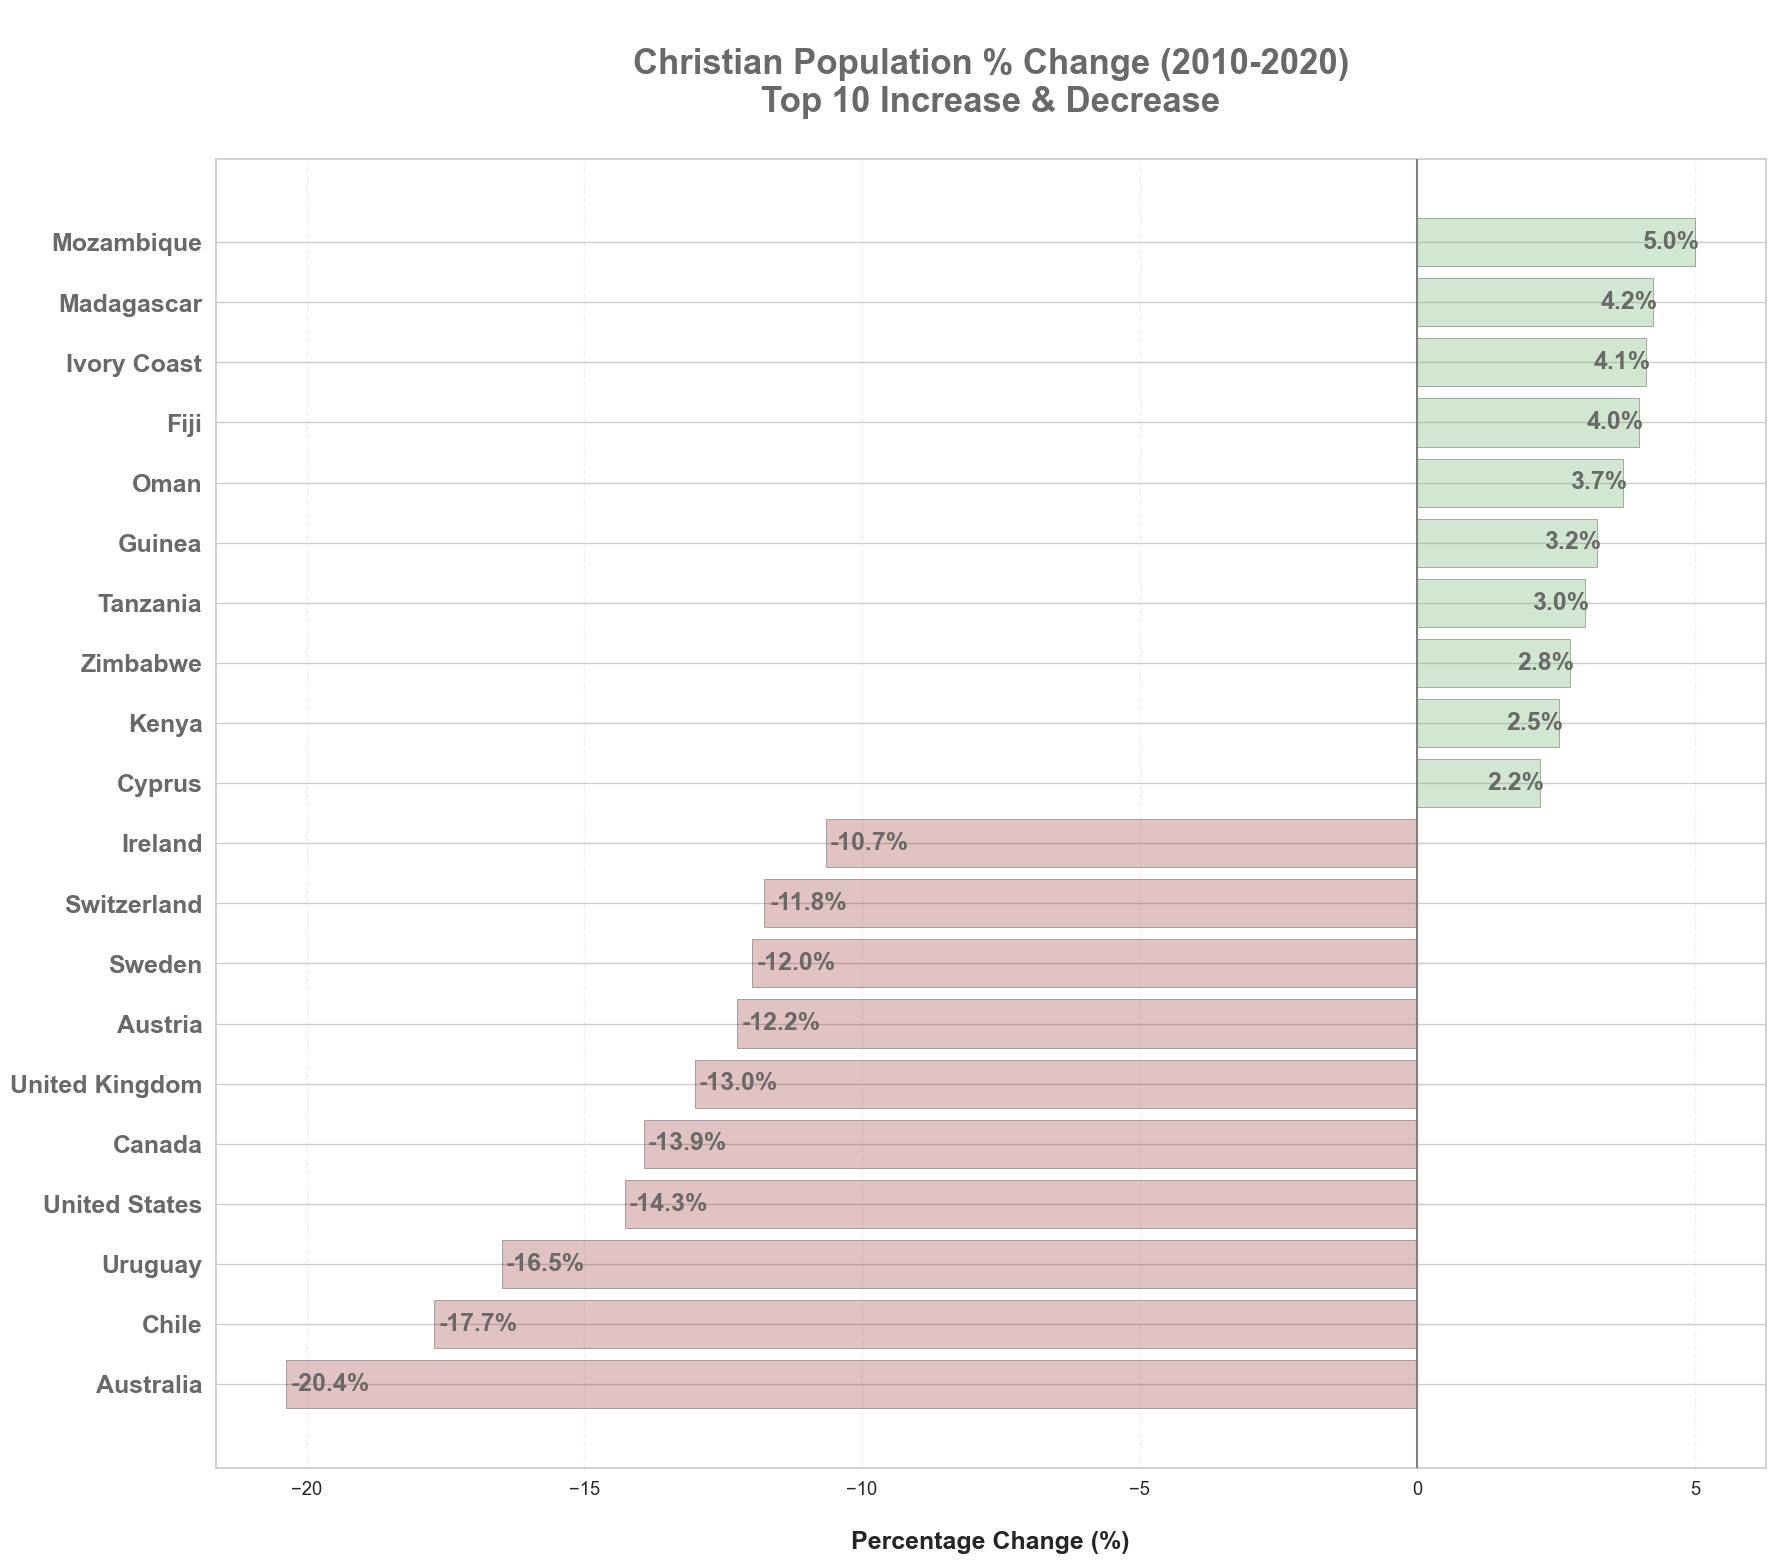

In [94]:
# Calculate Christian population changes (2010-2020)

filtered_df["chr_share"] = (filtered_df["Christians"] / filtered_df["Population"]) * 100

# Pivot the 'chr_share' column instead of the raw counts
chr_pivot = filtered_df.pivot(index="Country", columns="Year", values="chr_share")

# The change is the subtraction of the two percentages
chr_pivot["chr_pct_change"] = chr_pivot[2020] - chr_pivot[2010]

Top_Chr_Decline = chr_pivot.sort_values("chr_pct_change").head(10)
Top_Chr_Growth = chr_pivot.sort_values("chr_pct_change").tail(10)

# Diverging bar chart - Percentage change
chr_pct = pd.concat([Top_Chr_Decline, Top_Chr_Growth]).sort_values("chr_pct_change")
fig, ax = plt.subplots(figsize=(20, 17))
colors = [ "#9E3A3A" if x < 0 else "#6BB16B" for x in chr_pct["chr_pct_change"]]
bars = ax.barh(range(len(chr_pct)), chr_pct["chr_pct_change"], color=colors, alpha=0.3, edgecolor="black", linewidth=0.7)
ax.axvline(x=0, color="grey", linewidth=1.5, zorder=3)
ax.set_yticks(range(len(chr_pct)))
ax.set_yticklabels(chr_pct.index, fontsize=18, fontweight="bold", color="" \
"dimgrey")
ax.set_xlabel("\nPercentage Change (%)", fontsize=18, fontweight="bold")
ax.set_title("\nChristian Population % Change (2010-2020)\nTop 10 Increase & Decrease\n", 
             fontsize=25, fontweight="bold", color="dimgrey")

# Add percentage labels on bars
for i, value in enumerate(chr_pct["chr_pct_change"]):
    if value < 0:
        ha = "right"
        offset = 1.5
    else:
        ha = "left"
        offset = -0.95
    ax.text(value + offset, i, f"{value:.1f}%", va="center", ha=ha,
             fontsize=18, fontweight="bold", clip_on=False, color="dimgrey")

ax.grid(axis="x", alpha=0.3, linestyle="--")
plt.show()

### 3.  Analysis of Muslim Populations

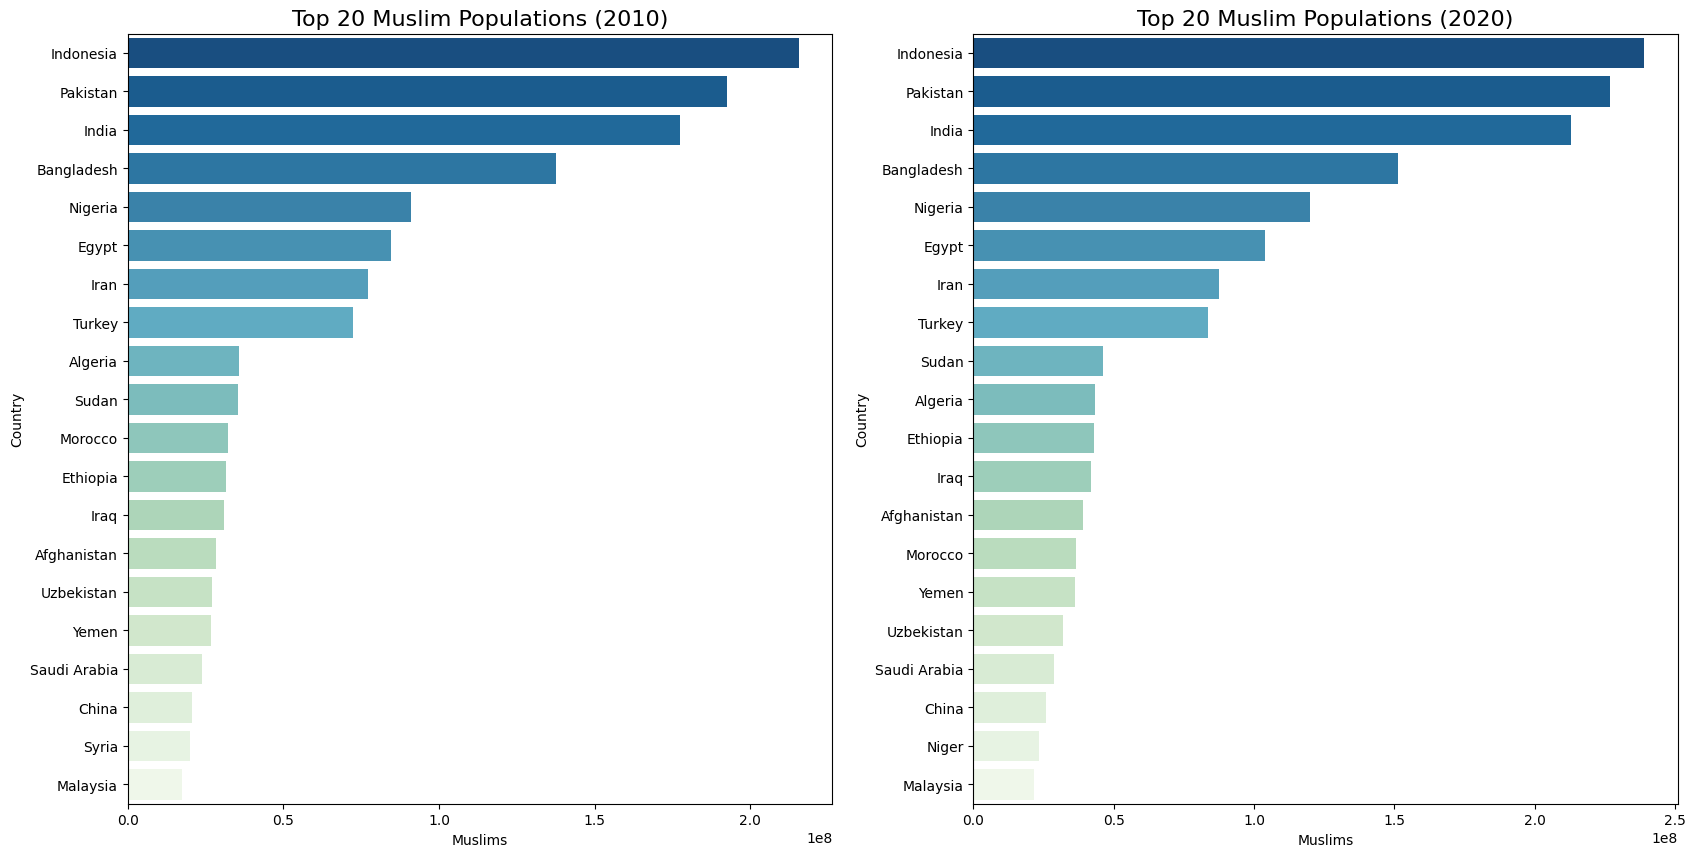

In [46]:
#percentage of muslims in a given nation
filtered_df["natl_mus_prop(%)"] = round((filtered_df["Muslims"] / filtered_df["Population"]) * 100, 2)
#percentage of christians in the world

filtered_df["wrld_mus_prop(%)"] = filtered_df.groupby("Year")["Muslims"].transform(
    lambda x: round((x / x.sum()) * 100, 2)
)

#Top countries by count
Top_Muslim_2010 = filtered_df[(filtered_df["Year"] == 2010)]\
    .sort_values(by="Muslims", ascending=False)\
        [["Country","Muslims", "Population","natl_mus_prop(%)", "wrld_mus_prop(%)"]].head(20)

#Top countries by count
Top_Muslim_2020 = filtered_df[(filtered_df["Year"] == 2020)]\
    .sort_values(by="Muslims", ascending=False)\
        [["Country","Muslims", "Population","natl_mus_prop(%)", "wrld_mus_prop(%)"]].head(20)

Top_Muslim_2020 
fig, ax = plt.subplots (1,2, figsize=(20,10))

sns.barplot(data=Top_Muslim_2010, x="Muslims", y="Country", hue ="Country", palette="GnBu_r", ax=ax[0])
ax[0].set_title("Top 20 Muslim Populations (2010)", fontsize=16)
sns.barplot(data=Top_Muslim_2020, x="Muslims", y="Country", hue ="Country", palette="GnBu_r", ax=ax[1])
ax[1].set_title("Top 20 Muslim Populations (2020)", fontsize=16)

plt.show()

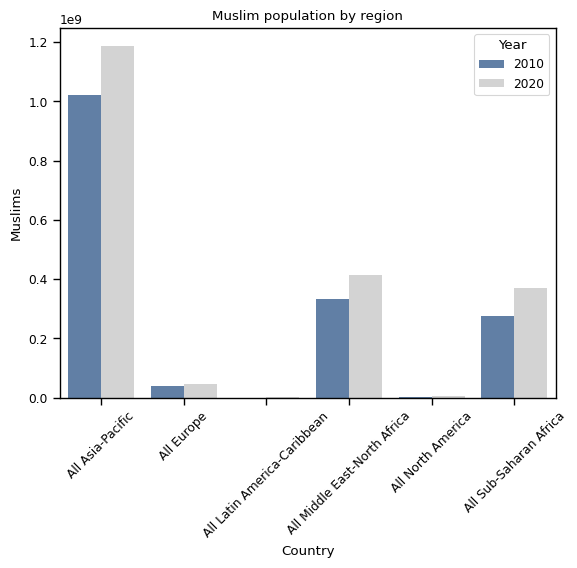

In [ ]:
#percentage of muslims in a given region
nation_df["natl_mus_prop(%)"] = round((nation_df["Muslims"] / 
                                            nation_df["Population"]) * 100, 2)
#percentage of muslims in the world
nation_df["wrld_mus_prop(%)"] = nation_df.groupby("Year")["Muslims"].transform(
    lambda x: round((x / x.sum()) * 100, 2)
)

sns.set_context('paper')

sns.barplot(data=nation_df, x="Country",y="Muslims", hue ="Year", palette= ["#557EB1", "lightgrey"])
plt.xticks(rotation=45)
plt.title("Muslim population by region")
plt.show()


In [ ]:
filtered_df[""]

In [64]:
mus_2010_np = filtered_df[(filtered_df["Year"] == 2010)]\
    .sort_values(by="natl_mus_prop(%)", ascending=False)\
        [["Country","Muslims", "Population","natl_mus_prop(%)", "wrld_mus_prop(%)"]].head(20)

(GT(mus_2010_np)
 .tab_header(
     title="Top Muslim Countries by National Proportion (2010)"
 )
 .tab_options(table_font_size="12px")
 .opt_stylize(color="gray")
 .cols_label(**{"natl_mus_prop(%)": "National Proportion(%)",
                "wrld_mus_prop(%)": "Global Proportion(%)"})
 .fmt_number(columns=["Muslims","Population"])
               
)

GT(_tbl_data=                     Country   Muslims  Population  natl_mus_prop(%)  \
338                  Somalia  12238110    12261757             99.81   
410                    Yemen  26695431    26754387             99.78   
14               Afghanistan  28213147    28284089             99.75   
178                     Iran  77213206    77420843             99.73   
354                    Sudan  35308582    35414400             99.70   
254                  Morocco  32356548    32467016             99.66   
88                   Comoros    651810      654836             99.54   
408           Western Sahara    407710      409716             99.51   
380                  Tunisia  10700500    10765980             99.39   
180                     Iraq  30807685    31045366             99.23   
240               Mauritania   3361284     3390965             99.12   
366               Tajikistan   7568826     7652141             98.91   
286  Palestinian territories   3968464     4016916             98.79   
244                  Mayotte    204650      207422             98.66   
382                   Turkey  72341063    73346769             98.63   
272                    Niger  16314579    16548835             98.58   
18                   Algeria  35671272    36188236             98.57   
106                 Djibouti    906185      930252             97.41   
32                Azerbaijan   8883621     9146851             97.12   
218                    Libya   6291116     6497839             96.82   

     wrld_mus_prop(%)  
338              0.73  
410              1.59  
14               1.68  
178              4.61  
354              2.11  
254              1.93  
88               0.04  
408              0.02  
380              0.64  
180              1.84  
240              0.20  
366              0.45  
286              0.24  
244              0.01  
382              4.32  
272              0.97  
18               2.13  
106              0.05  
32               0.53  
218              0.38  , _body=<great_tables._gt_data.Body object at 0x120f8b1d0>, _boxhead=Boxhead([ColInfo(var='Country', type=<ColInfoTypeEnum.default: 1>, column_label='Country', column_align='left', column_width=None), ColInfo(var='Muslims', type=<ColInfoTypeEnum.default: 1>, column_label='Muslims', column_align='right', column_width=None), ColInfo(var='Population', type=<ColInfoTypeEnum.default: 1>, column_label='Population', column_align='right', column_width=None), ColInfo(var='natl_mus_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='National Proportion(%)', column_align='right', column_width=None), ColInfo(var='wrld_mus_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='Global Proportion(%)', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x123de02f0>, _spanners=Spanners([]), _heading=Heading(title='Top Muslim Countries by National Proportion (2010)', subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x12579b020>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x1257981d0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x1233ce1e0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x125a4b7a0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='tab

In [ ]:
mus_2020_np = filtered_df[(filtered_df["Year"] == 2020)]\
    .sort_values(by="natl_mus_prop(%)", ascending=False)\
        [["Country","Muslims", "Population","natl_mus_prop(%)", "wrld_mus_prop(%)"]].head(20)

(GT(mus_2020_np)
 .tab_header(
     title="Top Muslim Countries by National Proportion(2020)"
 )
 .tab_options(table_font_size="12px")
 .opt_stylize(color="gray")
 .cols_label(**{"natl_mus_prop(%)": "National Proportion(%)",
                "wrld_mus_prop(%)": "Global Proportion(%)"})
 .fmt_number(columns=["Muslims","Population"])
               
)

GT(_tbl_data=                     Country   Muslims  Population  natl_mus_prop(%)  \
15               Afghanistan  39015051    39068979             99.86   
411                    Yemen  36085366    36134864             99.86   
339                  Somalia  16623449    16651191             99.83   
179                     Iran  87524408    87723443             99.77   
255                  Morocco  36465499    36584208             99.68   
409           Western Sahara    546903      549365             99.55   
181                     Iraq  41905332    42116605             99.50   
381                  Tunisia  11890693    11974057             99.30   
241               Mauritania   4562658     4600131             99.19   
219                    Libya   6974559     7045399             98.99   
287  Palestinian territories   5017262     5069692             98.97   
367               Tajikistan   9643445     9749311             98.91   
355                    Sudan  46253736    46789231             98.86   
245                  Mayotte    281068      284371             98.84   
19                   Algeria  43329641    44042091             98.38   
89                   Comoros    788527      802164             98.30   
273                    Niger  23274875    23717614             98.13   
107                 Djibouti   1079460     1105189             97.67   
323                  Senegal  16378970    16789220             97.56   
383                   Turkey  83600950    86091692             97.11   

     wrld_mus_prop(%)  
15               1.93  
411              1.78  
339              0.82  
179              4.33  
255              1.80  
409              0.03  
181              2.07  
381              0.59  
241              0.23  
219              0.34  
287              0.25  
367              0.48  
355              2.29  
245              0.01  
19               2.14  
89               0.04  
273              1.15  
107              0.05  
323              0.81  
383              4.13  , _body=<great_tables._gt_data.Body object at 0x11a2c0920>, _boxhead=Boxhead([ColInfo(var='Country', type=<ColInfoTypeEnum.default: 1>, column_label='Country', column_align='left', column_width=None), ColInfo(var='Muslims', type=<ColInfoTypeEnum.default: 1>, column_label='Muslims', column_align='right', column_width=None), ColInfo(var='Population', type=<ColInfoTypeEnum.default: 1>, column_label='Population', column_align='right', column_width=None), ColInfo(var='natl_mus_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='National Proportion(%)', column_align='right', column_width=None), ColInfo(var='wrld_mus_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='Global Proportion(%)', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x11a3f35f0>, _spanners=Spanners([]), _heading=Heading(title='Top Countries by National Proportion of Muslims (2020)', subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x11a416c90>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x11a416120>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x11a416ba0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x11a414d10>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category=

### 4.  Analysis of Buddhist Populations

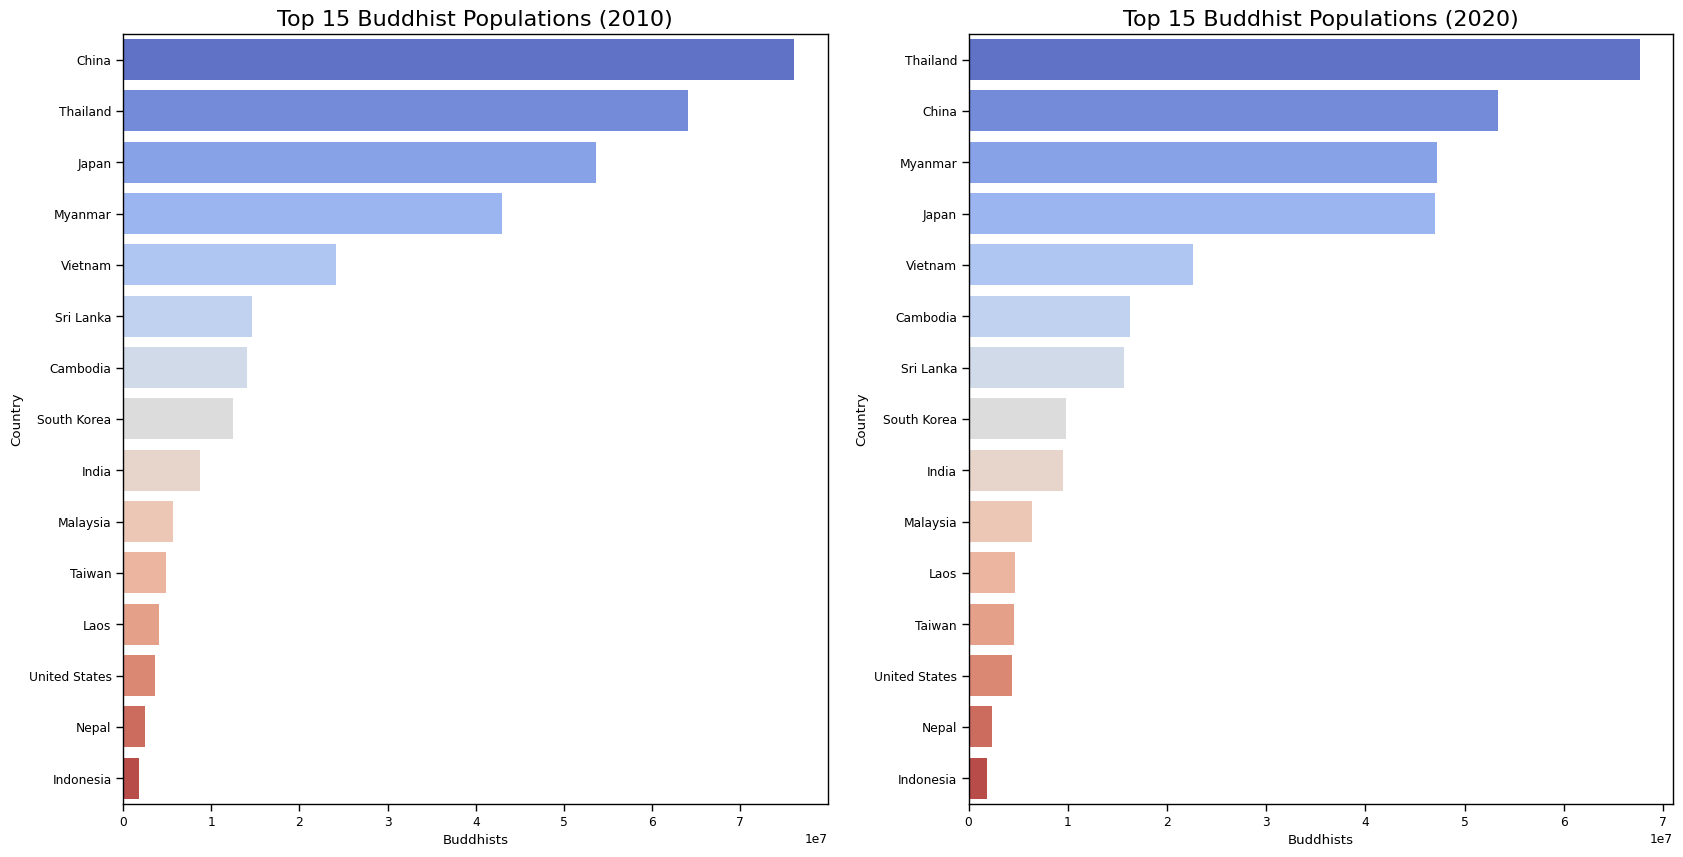

In [ ]:
#percentage of muslims in a given nation
df["natl_bud_prop(%)"] = round((df["Buddhists"] / 
                                            df["Population"]) * 100, 2)
#percentage of christians in the world
df["wrld_bud_prop(%)"] = round((df["Buddhists"] / 
df["Buddhists"].sum()) * 100, 2)

#Top countries by count
top_bud_2010 = df[(df["Year"] == 2010) & (df["Level"] == 1)]\
    .sort_values(by="Buddhists", ascending=False)\
        [["Country","Buddhists", "Population","natl_bud_prop(%)", "wrld_bud_prop(%)"]].head(15)

#Top countries by count
top_bud_2020 = df[(df["Year"] == 2020) & (df["Level"] == 1)]\
    .sort_values(by="Buddhists", ascending=False)\
        [["Country","Buddhists", "Population","natl_bud_prop(%)", "wrld_bud_prop(%)"]].head(15)
 
fig, ax = plt.subplots (1,2, figsize=(20,10))

sns.barplot(data=top_bud_2010, x="Buddhists", y="Country", hue ="Country", palette="coolwarm", ax=ax[0])
ax[0].set_title("Top 15 Buddhist Populations (2010)", fontsize=16)
sns.barplot(data=top_bud_2020, x="Buddhists", y="Country", hue ="Country", palette="coolwarm", ax=ax[1])
ax[1].set_title("Top 15 Buddhist Populations (2020)", fontsize=16)

plt.show()

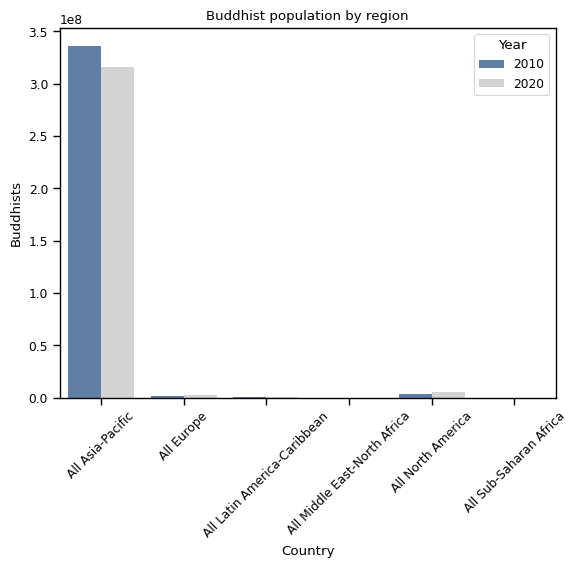

In [68]:
#percentage of buddhists in a given region
nation_df["natl_bud_prop(%)"] = round((nation_df["Buddhists"] / 
                                            nation_df["Population"]) * 100, 2)
#percentage of muslims in the world
nation_df["wrld_bud_prop(%)"] = nation_df.groupby("Year")["Buddhists"].transform(
    lambda x: round((x / x.sum()) * 100, 2)
)

sns.set_context('paper')

sns.barplot(data=nation_df, x="Country",y="Buddhists", hue ="Year", palette= ["#557EB1", "lightgrey"])
plt.xticks(rotation=45)
plt.title("Buddhist population by region")
plt.show()


In [24]:
bud_2010_np = df[(df["Year"] == 2010) & (df["Level"] == 1)]\
    .sort_values(by="natl_bud_prop(%)", ascending=False)\
        [["Country","Buddhists", "Population","natl_bud_prop(%)", "wrld_bud_prop(%)"]].head(20)
(GT(bud_2010_np)
 .tab_header(
     title="Top Countries by National Proportion of Buddhists (2010)"
 )
 .tab_options(table_font_size="12px")
 .opt_stylize(color="gray")
 .cols_label(**{"natl_bud_prop(%)": "National Proportion(%)",
                "wrld_bud_prop(%)": "Global Proportion(%)"})
 .fmt_number(columns=["Buddhists","Population"])
               
)

GT(_tbl_data=         Country  Buddhists  Population  natl_bud_prop(%)  wrld_bud_prop(%)
68      Cambodia   14055399    14500726             96.93              0.70
370     Thailand   64085976    68579448             93.45              3.20
258      Myanmar   42958198    49024382             87.63              2.15
50        Bhutan     524129      701632             74.70              0.03
348    Sri Lanka   14636626    20879089             70.10              0.73
208         Laos    4052538     6334194             63.98              0.20
250     Mongolia    1455812     2701732             53.88              0.07
192        Japan   53578758   128185275             41.80              2.68
330    Singapore    1676136     5077014             33.01              0.08
406      Vietnam   24125287    87455152             27.59              1.21
342  South Korea   12471060    48769333             25.57              0.62
364       Taiwan    4847485    23224049             20.87              0.24
230     Malaysia    5678959    28655777             19.82              0.28
224        Macao     110192      562806             19.58              0.01
168    Hong Kong     842421     7101617             11.86              0.04
262        Nepal    2471228    27341953              9.04              0.12
60        Brunei      30745      392332              7.84              0.00
84         China   76098118  1351561514              5.63              3.80
28     Australia     603817    22141581              2.73              0.03
276  North Korea     379042    24987259              1.52              0.02, _body=<great_tables._gt_data.Body object at 0x116e37bf0>, _boxhead=Boxhead([ColInfo(var='Country', type=<ColInfoTypeEnum.default: 1>, column_label='Country', column_align='left', column_width=None), ColInfo(var='Buddhists', type=<ColInfoTypeEnum.default: 1>, column_label='Buddhists', column_align='right', column_width=None), ColInfo(var='Population', type=<ColInfoTypeEnum.default: 1>, column_label='Population', column_align='right', column_width=None), ColInfo(var='natl_bud_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='National Proportion(%)', column_align='right', column_width=None), ColInfo(var='wrld_bud_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='Global Proportion(%)', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x11736c530>, _spanners=Spanners([]), _heading=Heading(title='Top Countries by National Proportion of Buddhists (2010)', subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x1175130e0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x117510380>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x117511070>, _formats=[<great_tables._gt_data.FormatInfo object at 0x116e34d40>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='12px'), table_font_weight=OptionsInfo(scss=True, category='t

In [25]:
bud_2020_np = df[(df["Year"] == 2020) & (df["Level"] == 1)]\
    .sort_values(by="natl_bud_prop(%)", ascending=False)\
        [["Country","Buddhists", "Population","natl_bud_prop(%)", "wrld_bud_prop(%)"]].head(20)
(GT(bud_2020_np)
 .tab_header(
     title="Top Countries by National Proportion of Buddhists (2020)"
 )
 .tab_options(table_font_size="12px")
 .opt_stylize(color="gray")
 .cols_label(**{"natl_bud_prop(%)": "National Proportion(%)",
                "wrld_bud_prop(%)": "Global Proportion(%)"})
 .fmt_number(columns=["Buddhists","Population"])
               
)

GT(_tbl_data=         Country  Buddhists  Population  natl_bud_prop(%)  wrld_bud_prop(%)
69      Cambodia   16238906    16725474             97.09              0.81
371     Thailand   67624158    71641484             94.39              3.38
259      Myanmar   47211798    53016522             89.05              2.36
51        Bhutan     575466      770006             74.74              0.03
349    Sri Lanka   15703005    22561807             69.60              0.78
209         Laos    4713753     7346533             64.16              0.24
251     Mongolia    1682746     3290786             51.14              0.08
193        Japan   46992375   126304543             37.21              2.35
331    Singapore    1731090     5620151             30.80              0.09
407      Vietnam   22578634    98079191             23.02              1.13
225        Macao     133571      683067             19.55              0.01
365       Taiwan    4540722    23663459             19.19              0.23
343  South Korea    9853408    51858482             19.00              0.49
231     Malaysia    6396860    33889559             18.88              0.32
169    Hong Kong     630077     7490236              8.41              0.03
263        Nepal    2377791    28966575              8.21              0.12
61        Brunei      28172      447404              6.30              0.00
85         China   53378804  1426106093              3.74              2.67
29     Australia     672312    25743791              2.61              0.03
73        Canada     663179    38171902              1.74              0.03, _body=<great_tables._gt_data.Body object at 0x117510680>, _boxhead=Boxhead([ColInfo(var='Country', type=<ColInfoTypeEnum.default: 1>, column_label='Country', column_align='left', column_width=None), ColInfo(var='Buddhists', type=<ColInfoTypeEnum.default: 1>, column_label='Buddhists', column_align='right', column_width=None), ColInfo(var='Population', type=<ColInfoTypeEnum.default: 1>, column_label='Population', column_align='right', column_width=None), ColInfo(var='natl_bud_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='National Proportion(%)', column_align='right', column_width=None), ColInfo(var='wrld_bud_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='Global Proportion(%)', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x116389a00>, _spanners=Spanners([]), _heading=Heading(title='Top Countries by National Proportion of Buddhists (2020)', subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x117526480>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x117526180>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x117527e90>, _formats=[<great_tables._gt_data.FormatInfo object at 0x1174ba960>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='12px'), table_font_weight=OptionsInfo(scss=True, category='t

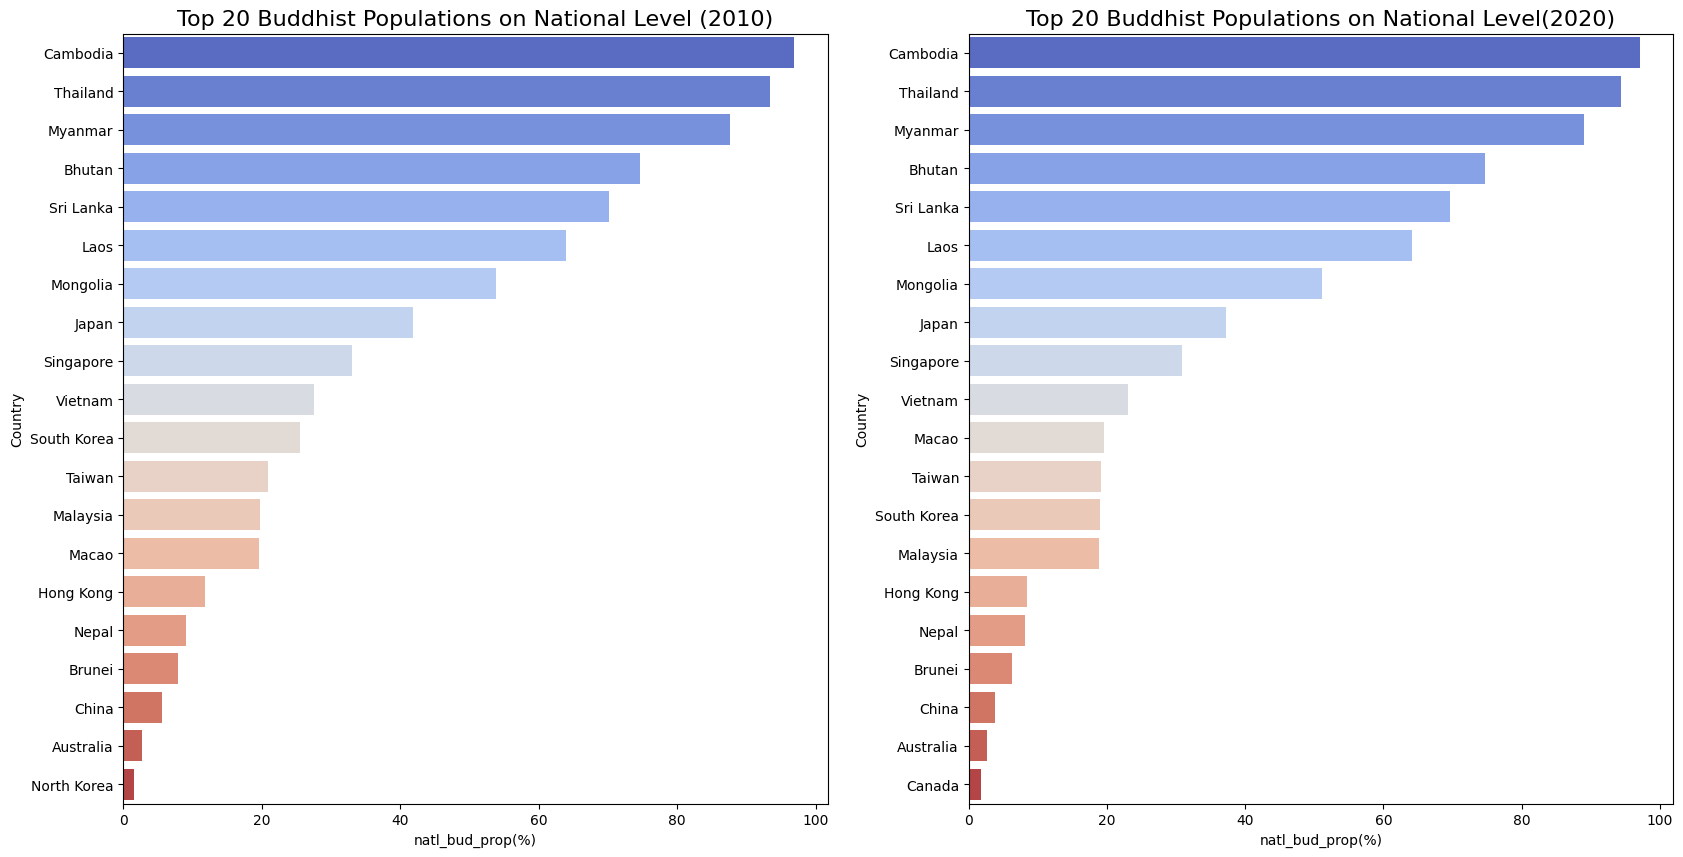

In [26]:
fig, ax = plt.subplots (1,2, figsize=(20,10))

sns.barplot(data=bud_2010_np, x="natl_bud_prop(%)", y="Country", hue ="Country", palette="coolwarm", ax=ax[0])
ax[0].set_title("Top 20 Buddhist Populations on National Level (2010)", fontsize=16)
sns.barplot(data=bud_2020_np, x="natl_bud_prop(%)", y="Country", hue ="Country", palette="coolwarm", ax=ax[1])
ax[1].set_title("Top 20 Buddhist Populations on National Level(2020)", fontsize=16)

plt.show()

### 5.  Analysis of Religiously Unaffiliated

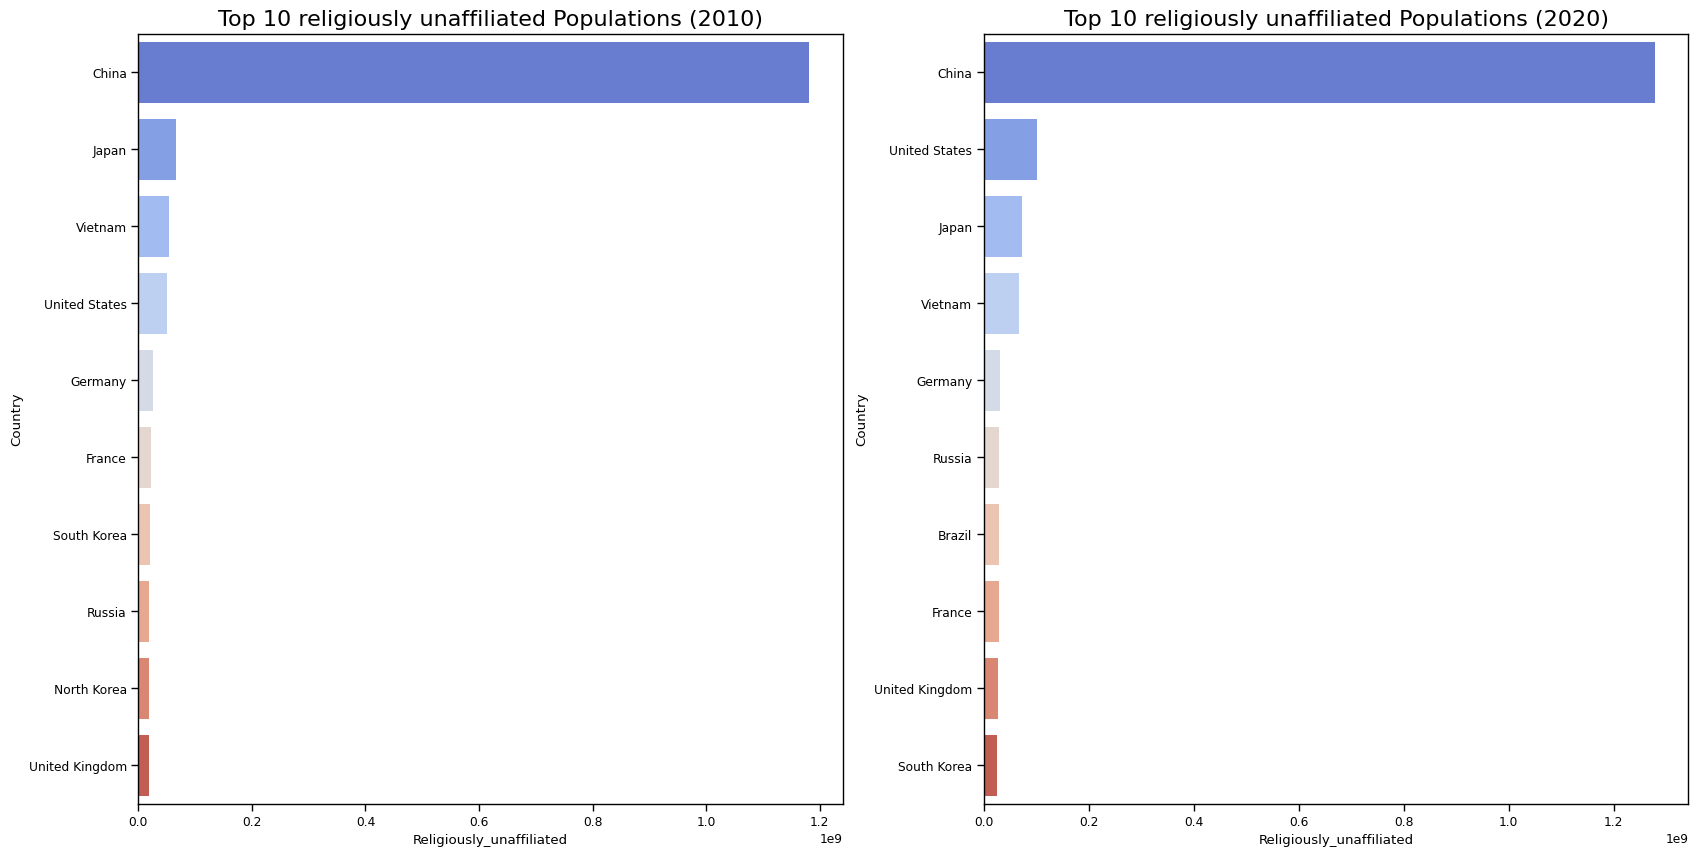

In [76]:
df["natl_ru_prop(%)"] = round((df["Religiously_unaffiliated"] / 
                                            df["Population"]) * 100, 2)
#percentage of christians in the world
df["wrld_ru_prop(%)"] = round((df["Religiously_unaffiliated"] / 
df["Religiously_unaffiliated"].sum()) * 100, 2)

#Top countries by count
top_ru_2010 = df[(df["Year"] == 2010) & (df["Level"] == 1)]\
    .sort_values(by="Religiously_unaffiliated", ascending=False)\
        [["Country","Religiously_unaffiliated", "Population","natl_ru_prop(%)", "wrld_ru_prop(%)"]].head(10)

top_ru_2020 = df[(df["Year"] == 2020) & (df["Level"] == 1)]\
    .sort_values(by="Religiously_unaffiliated", ascending=False)\
        [["Country","Religiously_unaffiliated", "Population","natl_ru_prop(%)", "wrld_ru_prop(%)"]].head(10)

fig, ax = plt.subplots (1,2, figsize=(20,10))

sns.barplot(data=top_ru_2010, x="Religiously_unaffiliated", y="Country", hue ="Country", palette="coolwarm", ax=ax[0])
ax[0].set_title("Top 10 religiously unaffiliated Populations (2010)", fontsize=16)
sns.barplot(data=top_ru_2020, x="Religiously_unaffiliated", y="Country", hue ="Country", palette="coolwarm", ax=ax[1])
ax[1].set_title("Top 10 religiously unaffiliated Populations (2020)", fontsize=16)

plt.show()


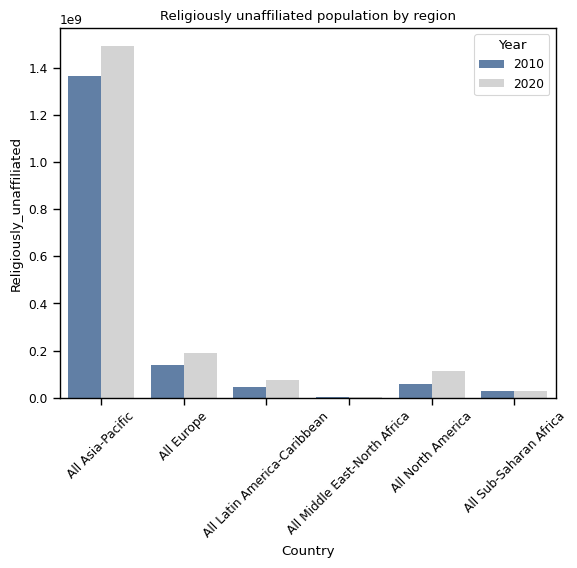

In [ ]:
#percentage of unaffiliated in a given region
nation_df["natl_ru_prop(%)"] = round((nation_df["Religiously_unaffiliated"] / 
                                            nation_df["Population"]) * 100, 2)
#percentage of unaffiliatedin the world
nation_df["wrld_ru_prop(%)"] = nation_df.groupby("Year")["Religiously_unaffiliated"].transform(
    lambda x: round((x / x.sum()) * 100, 2)
)

sns.set_context('paper')

sns.barplot(data=nation_df, x="Country",y="Religiously_unaffiliated", hue ="Year", palette= ["#557EB1", "lightgrey"])
plt.xticks(rotation=45)
plt.title("Religiously unaffiliated population by region")
plt.show()


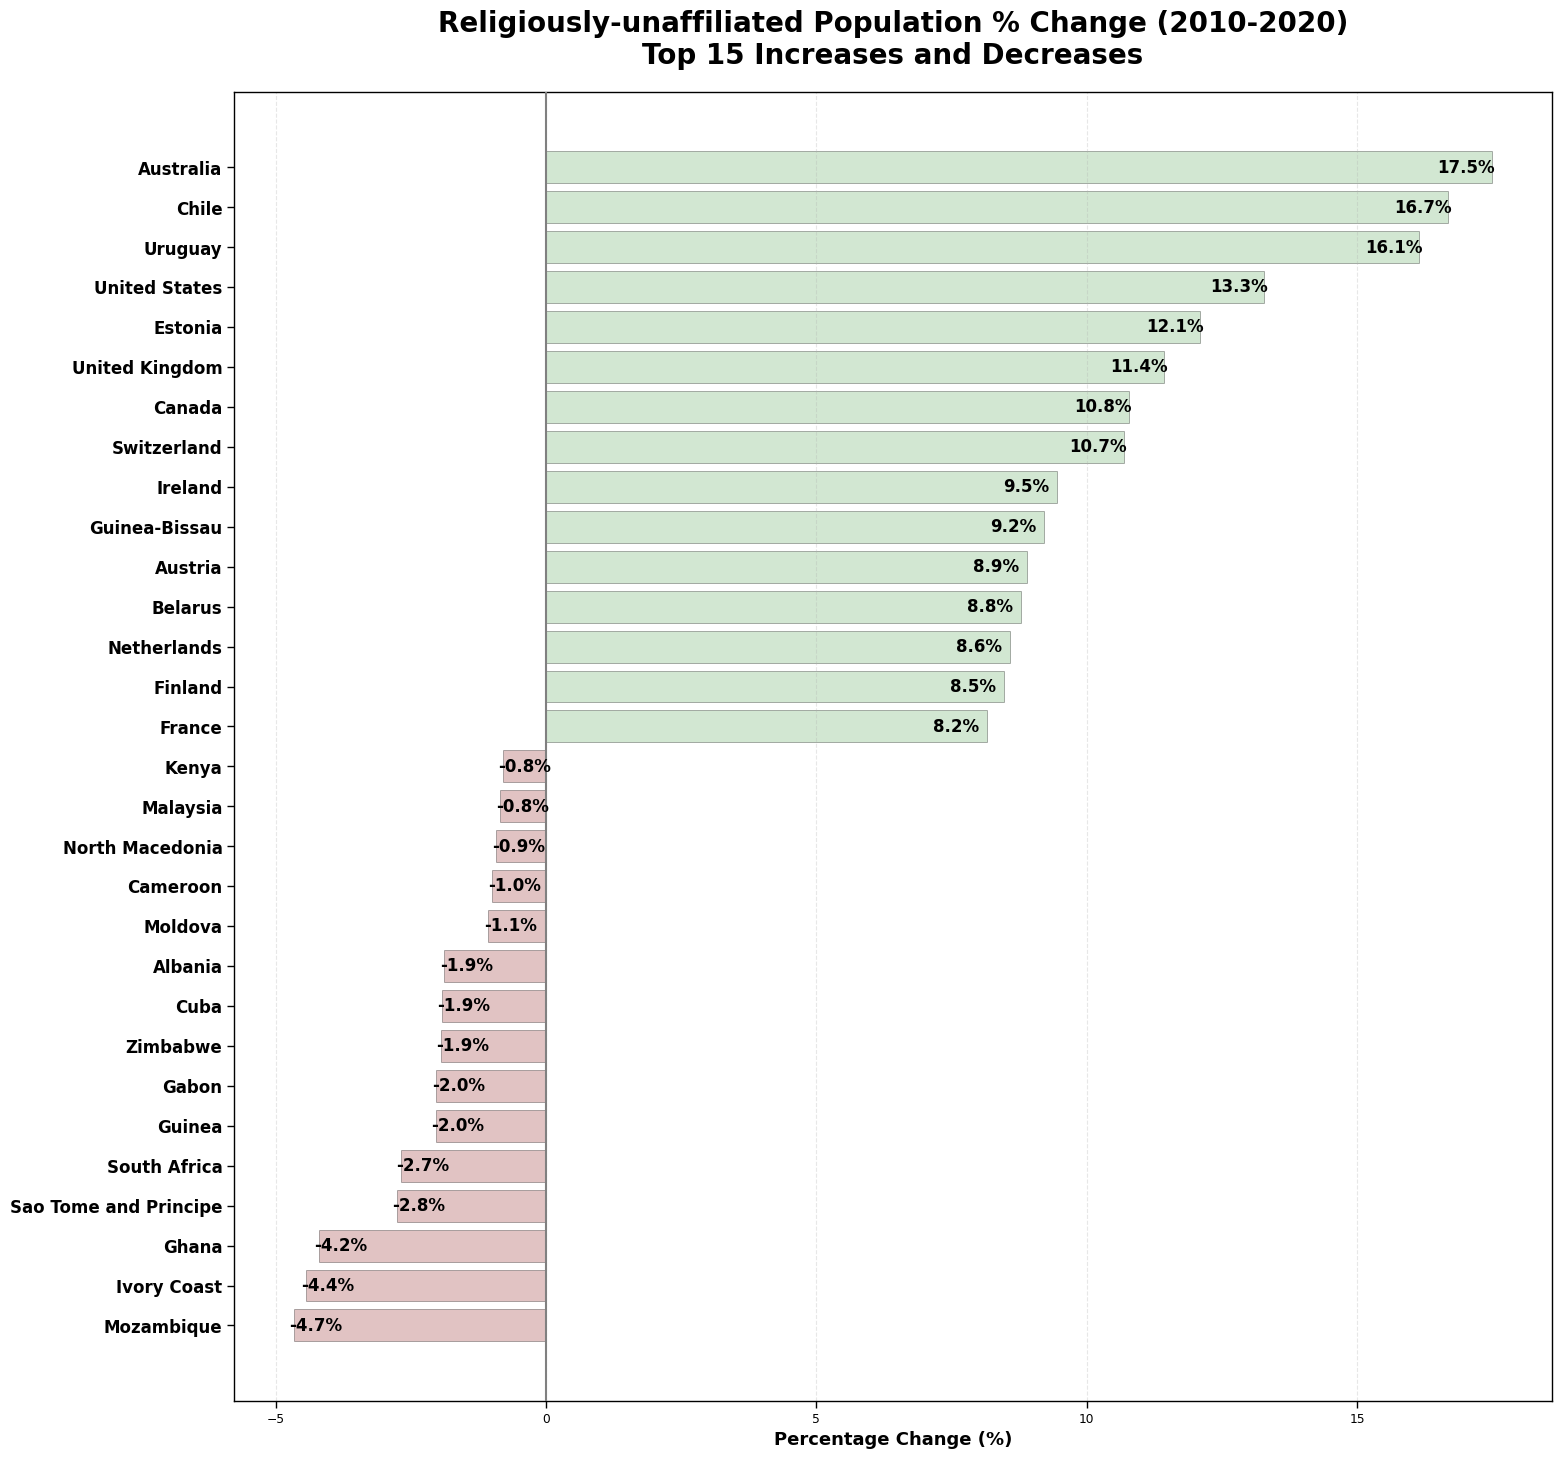

In [141]:
# Calculate Christian population changes (2010-2020)

# Calculate the % share of the population in the main dataframe first
filtered_df["ru_share"] = (filtered_df["Religiously_unaffiliated"] / filtered_df["Population"]) * 100

# Pivot the 'ru_share' column instead of the raw counts
ru_pivot = filtered_df.pivot(index="Country", columns="Year", values="ru_share")

# The change is the subtraction of the two percentages
ru_pivot["ru_pct_change"] = ru_pivot[2020] - ru_pivot[2010]

# Remove NaN and inf values first
ru_pivot_clean = ru_pivot.replace([float('inf'), -float('inf')], float('nan')).dropna(subset=["ru_pct_change"])

# Then get top 15
Top_Ru_Decline = ru_pivot_clean.sort_values("ru_pct_change").head(15)
Top_Ru_Growth = ru_pivot_clean.sort_values("ru_pct_change").tail(15)

# Diverging bar chart - Percentage change
ru_pct = pd.concat([Top_Ru_Decline, Top_Ru_Growth]).sort_values("ru_pct_change")
ru_pct = ru_pct[ru_pct["ru_pct_change"].notna() & (ru_pct["ru_pct_change"] != float('inf'))]
fig, ax = plt.subplots(figsize=(17, 17))
colors = [ "#9E3A3A" if x < 0 else "#6BB16B" for x in ru_pct["ru_pct_change"]]
bars = ax.barh(range(len(ru_pct)), ru_pct["ru_pct_change"], color=colors, alpha=0.3, edgecolor="black", linewidth=0.7)
ax.axvline(x=0, color="grey", linewidth=1.5, zorder=3)
ax.set_yticks(range(len(ru_pct)))
ax.set_yticklabels(ru_pct.index, fontsize=12, fontweight="bold")
ax.set_xlabel("Percentage Change (%)", fontsize=13, fontweight="bold")
ax.set_title("Religiously-unaffiliated Population % Change (2010-2020)\nTop 15 Increases and Decreases", fontsize=20, fontweight="bold", pad=20)

# Add percentage labels on bars
for i, value in enumerate(ru_pct["ru_pct_change"]):
    if value < 0:
        ha = "right"
        offset = 0.9
    else:
        ha = "left"
        offset = -1
    ax.text(value + offset, i, f"{value:.1f}%", va="center", ha=ha, fontsize=12, fontweight="bold")

ax.grid(axis="x", alpha=0.3, linestyle="--")
plt.show()

In [100]:
Top_Ru_Growth

Year,2010,2020,ru_change,ru_pct_change
Country,,,,
Poland,1009890,3300106,2290216,226.778758
Sri Lanka,3738,15766,12028,321.776351
Romania,42877,182212,139335,324.964433
Azerbaijan,97725,484645,386920,395.927347
Sudan,44463,263523,219060,492.679306
Guinea-Bissau,37820,233987,196167,518.685880
Senegal,452,3476,3024,669.026549
Niger,35194,290355,255161,725.012786
Uganda,5008,42181,37173,742.272364


In [28]:
ru_2010_np = df[(df["Year"] == 2010) & (df["Level"] == 1)]\
    .sort_values(by="natl_ru_prop(%)", ascending=False)\
        [["Country","Religiously_unaffiliated", "Population","natl_ru_prop(%)", "wrld_ru_prop(%)"]].head(20)
(GT(ru_2010_np)
 .tab_header(
     title="Top Religiously Unaffiliated Countries on National Level (2010)"
 )
 .tab_options(table_font_size="12px")
 .opt_stylize(color="gray")
 .cols_label(**{"natl_ru_prop(%)": "National Proportion(%)",
                "wrld_ru_prop(%)": "Global Proportion(%)"})
 .fmt_number(columns=["Religiously_unaffiliated","Population"])
               
)

GT(_tbl_data=            Country  Religiously_unaffiliated  Population  natl_ru_prop(%)  \
84            China                1181562175  1351561514            87.42   
276     North Korea                  18203829    24987259            72.85   
100  Czech Republic                   7171807    10464036            68.54   
168       Hong Kong                   4842871     7101617            68.19   
224           Macao                    381011      562806            67.70   
406         Vietnam                  54348859    87455152            62.14   
192           Japan                  66887002   128185275            52.18   
264     Netherlands                   7637896    16771235            45.54   
268     New Zealand                   1920876     4347771            44.18   
342     South Korea                  20160988    48769333            41.34   
250        Mongolia                   1011681     2701732            37.45   
398         Uruguay                   1203443     3318580            36.26   
132          France                  21867710    63417363            34.48   
44          Belgium                   3501101    10936626            32.01   
144         Germany                  25717125    80830924            31.82   
120         Estonia                    419499     1331449            31.51   
394  United Kingdom                  18135823    63006483            28.78   
334        Slovenia                    540677     2044612            26.44   
170         Hungary                   2493124     9979129            24.98   
28        Australia                   5504105    22141581            24.86   

     wrld_ru_prop(%)  
84             11.12  
276             0.17  
100             0.07  
168             0.05  
224             0.00  
406             0.51  
192             0.63  
264             0.07  
268             0.02  
342             0.19  
250             0.01  
398             0.01  
132             0.21  
44              0.03  
144             0.24  
120             0.00  
394             0.17  
334             0.01  
170             0.02  
28              0.05  , _body=<great_tables._gt_data.Body object at 0x1176a1fa0>, _boxhead=Boxhead([ColInfo(var='Country', type=<ColInfoTypeEnum.default: 1>, column_label='Country', column_align='left', column_width=None), ColInfo(var='Religiously_unaffiliated', type=<ColInfoTypeEnum.default: 1>, column_label='Religiously_unaffiliated', column_align='right', column_width=None), ColInfo(var='Population', type=<ColInfoTypeEnum.default: 1>, column_label='Population', column_align='right', column_width=None), ColInfo(var='natl_ru_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='National Proportion(%)', column_align='right', column_width=None), ColInfo(var='wrld_ru_prop(%)', type=<ColInfoTypeEnum.default: 1>, column_label='Global Proportion(%)', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x1174bafc0>, _spanners=Spanners([]), _heading=Heading(title='Top Religiously Unaffiliated Countries on National Level (2010)', subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x1176a24b0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x11731b080>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x11714efc0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x1175a5550>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), tabl

### 6. Analysis of Hindu Populations

In [69]:
#percentage of muslims in a given nation
filtered_df["natl_hindu_prop(%)"] = round((df["Hindus"] / 
                                            df["Population"]) * 100, 2)
#percentage of christians in the world
filtered_df["wrld_hindu_prop(%)"] = filtered_df.groupby("Year")["Hindus"].transform(
    lambda x: round((x / x.sum()) * 100, 2)
)

#Top countries by count
top_hindu_2010 = filtered_df[filtered_df["Year"] == 2010]\
    .sort_values(by="Hindus", ascending=False)\
        [["Country","Hindus", "Population","natl_hindu_prop(%)", "wrld_hindu_prop(%)"]].head(20)

top_hindu_2010 

,Country,Hindus,Population,natl_hindu_prop(%),wrld_hindu_prop(%)
174,India,994461463,1243481564,79.97,94.57
262,Nepal,22289965,27341953,81.52,2.12
38,Bangladesh,13030675,152201982,8.56,1.24
176,Indonesia,4172304,246305322,1.69,0.40
284,Pakistan,3512748,199239047,1.76,0.33
348,Sri Lanka,2626586,20879089,12.58,0.25
230,Malaysia,1799380,28655777,6.28,0.17
396,United States,1789528,311062790,0.58,0.17
394,United Kingdom,926556,63006483,1.47,0.09
392,United Arab Emirates,749553,6938363,10.80,0.07


In [29]:
dw = Datawrapper(access_token='3Rhtm8XglamsDBHDRMImspaIrBVXZvlZtTB4bKdYdOzVVoFpqspnU9QaWIjiYpVQ')